# Analyzing Netflix Dataset

In [2]:
import pandas as pd

# Load the dataset from your Downloads folder
df = pd.read_csv(r"C:\Users\patha\Downloads\Netflix_Dataset.csv")

# Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape  # (rows, columns)


(8807, 12)

In [4]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.fillna("NULL", inplace=True)


In [7]:
df.isnull().sum()  


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Explore Unique Values :

### This will show different ratings, countries, and genres available in the dataset.

In [8]:
print(df['rating'].unique())  # All unique ratings
print(df['country'].unique())  # All unique countries
print(df['listed_in'].unique())  # All unique genres


['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'NULL' 'TV-Y7-FV' 'UR']
['United States' 'South Africa' 'NULL' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdo

# Analyze Trends :


### This will show which rating appears the most (e.g., TV-MA, PG-13).

In [9]:
print(df['rating'].value_counts())


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NULL           4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


### This shows the top 10 countries with the most Netflix content.

In [10]:
print(df['country'].value_counts().head(10))


country
United States     2818
India              972
NULL               831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


### This gives the top 10 most popular genres on Netflix.

In [11]:
print(df['listed_in'].value_counts().head(10))


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


# Visualizing the Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


### Plot: Top 10 Most Common Ratings

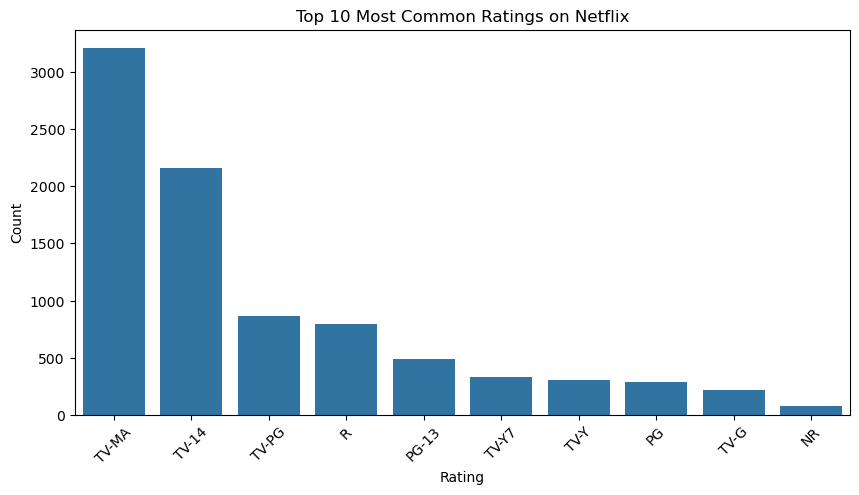

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['rating'].value_counts().head(10).index, y=df['rating'].value_counts().head(10).values)
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Top 10 Most Common Ratings on Netflix")
plt.show()


### Plot: Top 10 Countries Producing Content

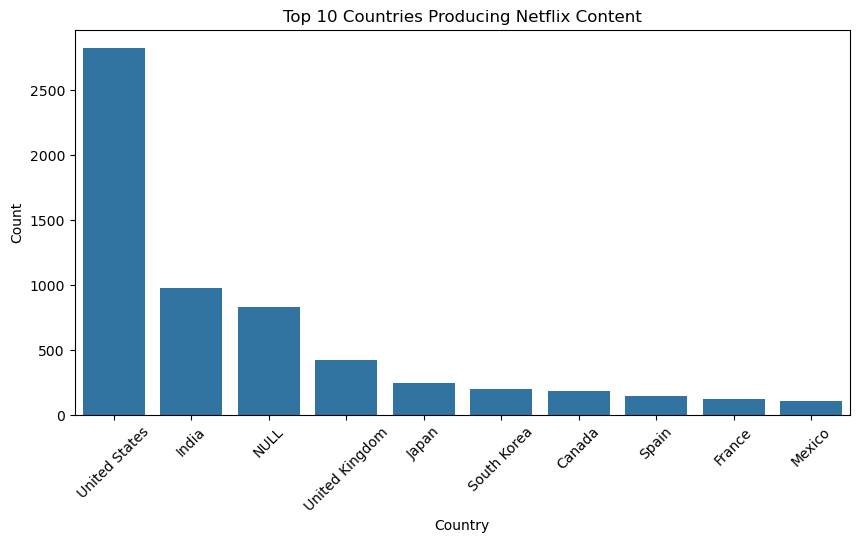

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['country'].value_counts().head(10).index, y=df['country'].value_counts().head(10).values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()


### Plot: Top 10 Most Popular Genres

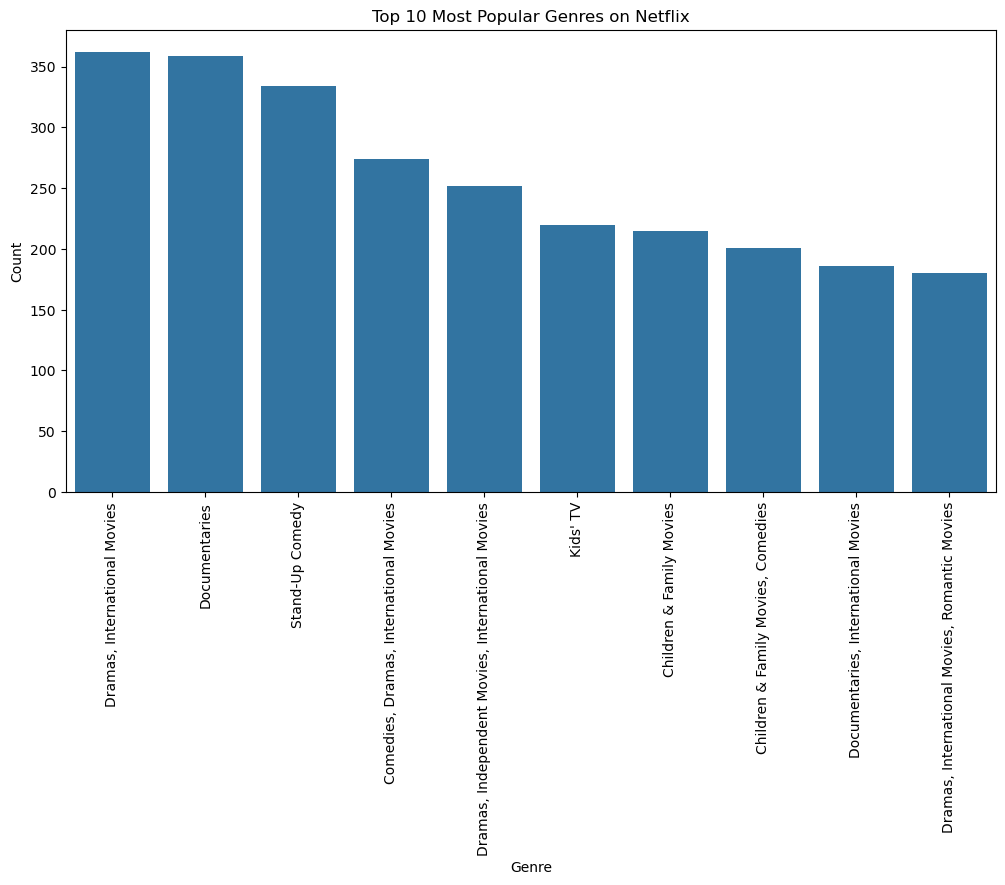

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['listed_in'].value_counts().head(10).index, y=df['listed_in'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Genres on Netflix")
plt.show()
